## Equity Portfolio

### Pull Data from Yahoo Finance

In [35]:
#Import libraries
import datetime, time
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2025, 6, 18)

!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate = 'chrome')

# Get Amazon, Ford and Bitcoin data
df = yfin.download(["NPN.JO", "BAW.JO", "BTC-USD"], start, end, auto_adjust = False, session = session)["Adj Close"]

df.to_csv("market_data.csv", index = False) #save to csv file, removing indexes
df.head()

[*********************100%***********************]  3 of 3 completed

Ticker,BAW.JO,BTC-USD,NPN.JO
Date,,,
2019-08-01,"9,898.308594","10,399.668945","236,187.609375"
2019-08-02,"9,854.285156","10,518.174805","227,625.703125"
2019-08-03,NaN,"10,821.726562",NaN
2019-08-04,NaN,"10,970.184570",NaN
2019-08-05,"9,649.125977","11,805.653320","217,191.453125"


In [21]:
#Summary 
df.describe()

Ticker,BAW.JO,BTC-USD,NPN.JO
count,"1,467.000000","2,148.000000","1,467.000000"
mean,"8,474.569983","38,979.703241","305,690.035841"
std,"1,632.192194","26,544.929763","75,463.635452"
min,"4,670.850098","4,970.788086","142,707.343750"
25%,"7,607.597168","17,630.747559","248,696.703125"
50%,"8,532.125977","32,802.185547","306,698.656250"
75%,"9,321.569824","57,343.607422","343,078.984375"
max,"12,766.615234","111,673.281250","544,000.000000"


#### Plot over the 2024 year

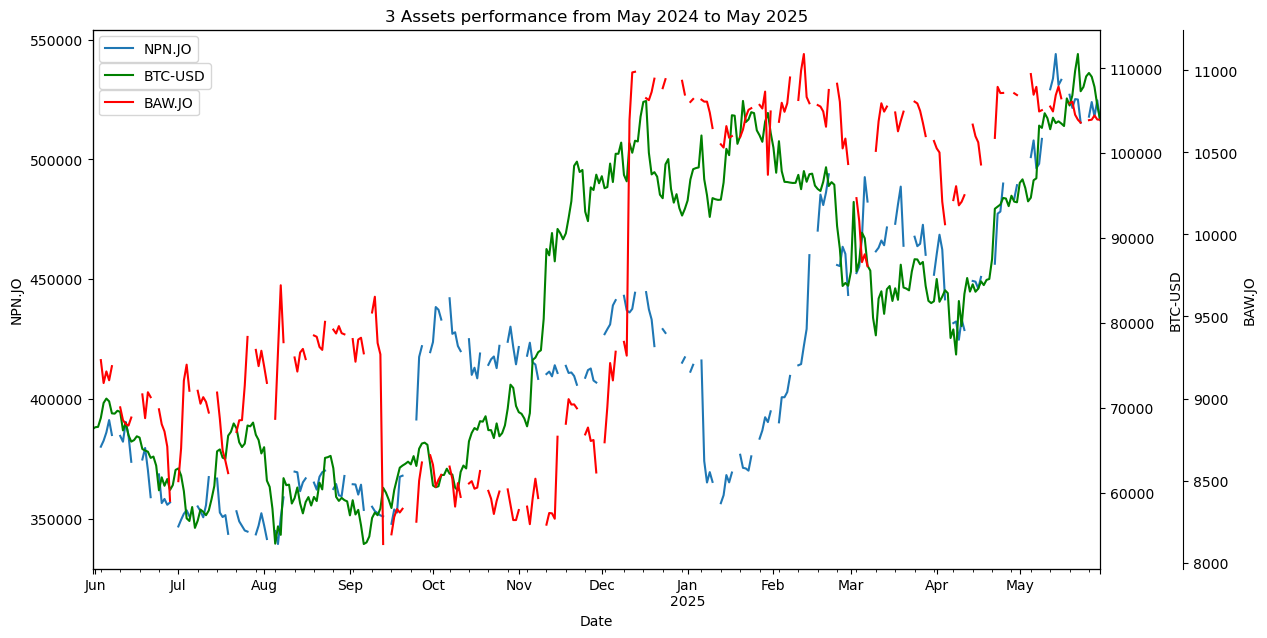

In [23]:
# Plot the three assets with the same index (x-axis) but different scale (y-axis)
fig = plt.figure(figsize = (13, 7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2024-05-31":"2025-05-30"].plot(ax = ax1, y = 'NPN.JO' , legend = True)
df["2024-05-31":"2025-05-30"].plot(ax = ax2, y = 'BTC-USD', legend = True, color = 'g')
df["2024-05-31":"2025-05-30"].plot(ax = ax3, y = 'BAW.JO' , legend = True, color = 'r')

# We set the labels to the axes
ax1.set_ylabel('NPN.JO')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('BAW.JO')
ax3.spines['right'].set_position(('outward', 60))

# Set position of legends
ax1.legend(['NPN.JO'] , loc = 'upper left')
ax2.legend(['BTC-USD'], loc = 'upper left', bbox_to_anchor = (0, 0.95))
ax3.legend(['BAW.JO'] , loc = 'upper left', bbox_to_anchor = (0, 0.9))

plt.title("3 Assets performance from May 2024 to May 2025")
plt.show()

### Return on Investment

If we invested R1 000 into each of these assets on 01 August 2019, how much we'd have to buy?

In [24]:
# Prices on 01/08/2019
first_row = df.iloc[0]

# Assign price values to variables (convert to Rands)
npn_price = first_row["NPN.JO"]/100
baw_price = first_row["BAW.JO"]/100
btc_price = first_row["BTC-USD"]/100

# Print price values
print("Purchase price of NPN.JO:", "R{:,.2f}".format(np.round(npn_price, 2)))
print("Purchase price of BAW.JO:", "R{:,.2f}".format(np.round(baw_price, 2)))
print("Purchase price of BTC-USD:", "R{:,.2f}".format(np.round(btc_price, 2)))
print(" - - - - - - - - - -")

# Divide $1,000 by each of price values to get number of shares
npn_shares = 1000 / npn_price
baw_shares = 1000 / baw_price
btc_shares = 1000 / btc_price

# Print number of shares for each ticker at start of investment period
print("Number of shares of NPN.JO:", np.round(npn_shares, 3), "shares")
print("Number of shares of BAW.JO:", np.round(baw_shares, 3), "shares")
print("Number of shares of BTC-USD:", np.round(btc_shares, 3), "shares")

Purchase price of NPN.JO: R2,361.88
Purchase price of BAW.JO: R98.98
Purchase price of BTC-USD: R104.00
 - - - - - - - - - -
Number of shares of NPN.JO: 0.423 shares
Number of shares of BAW.JO: 10.103 shares
Number of shares of BTC-USD: 9.616 shares


How much are they worth today?

In [28]:
# Get last date prices (i.e on 17 June 2025)
last_row = df.iloc[-1]

# Assign end date prices
npn_price_end = last_row["NPN.JO"]/100
baw_price_end = last_row["BAW.JO"]/100
btc_price_end = last_row["BTC-USD"]/100

# Print end date prices
print("End price of NPN.JO:", "R{:,.2f}".format(np.round(npn_price_end, 2)))
print("End price of BAW.JO:", "R{:,.2f}".format(np.round(baw_price_end, 2)))
print("End price of BTC-USD:", "R{:,.2f}".format(np.round(btc_price_end, 2)))
print(" - - - - - - - - - -")

# Compute end date values for each ticker (there were no stock/reverse splits during this period for either assets)
npn_value = npn_price_end * npn_shares 
baw_value = baw_price_end * baw_shares
btc_value = btc_price_end * btc_shares

# Print end date values
print("Holding value of NPN.JO:", "R{:,.2f}".format(np.round(npn_value, 2)))
print("Holding value of BAW.JO:", "R{:,.2f}".format(np.round(baw_value, 2)))
print("Holding value of BTC-USD:", "R{:,.2f}".format(np.round(btc_value, 2)))

End price of NPN.JO: R5,330.43
End price of BAW.JO: R109.49
End price of BTC-USD: R1,046.01
 - - - - - - - - - -
Holding value of NPN.JO: R2,256.86
Holding value of BAW.JO: R1,106.13
Holding value of BTC-USD: R10,058.12


NB: Naspers did continue with its Prosus share swap and buyback programs, which are strategic restructuring actions but not traditional stock splits.

Simple Returns:  $$ R_{\text{simple}} = \frac{P_1 - P_0}{P_0}$$

In [29]:
P0 = 1000 #Initial value

# Compute simple returns
npn_return = (npn_value - P0) / P0
baw_return = (baw_value - P0) / P0
btc_return = (btc_value - P0) / P0

# Print the returns
print("Simple return of NPN:", np.round(npn_return * 100, 3), "%")
print("Simple return of BAW:", np.round(baw_return * 100, 3), "%")
print("Simple return of BTC-USD:", np.round(btc_return * 100, 3), "%")

Simple return of NPN: 125.686 %
Simple return of BAW: 10.613 %
Simple return of BTC-USD: 905.812 %


### Compare to Bond Returns

In [36]:
#Localize index to UTC timezone (i.e. convert to TimeSeries)
df.index = df.index.tz_localize('UTC') 

#Download ETF BLV (Vanguard Long-Term Bond ETF)
df = df.join(yfin.download(["BLV"], start, end, auto_adjust = False)["Adj Close"].tz_localize('UTC'))

df.tail()

[*********************100%***********************]  1 of 1 completed


Ticker,BAW.JO,BTC-USD,NPN.JO,BLV
Date,,,,
2025-06-13 00:00:00+00:00,"10,964.797852","106,090.968750","531,250.000000",68.080002
2025-06-14 00:00:00+00:00,NaN,"105,472.406250",NaN,NaN
2025-06-15 00:00:00+00:00,NaN,"105,552.023438",NaN,NaN
2025-06-16 00:00:00+00:00,NaN,"106,796.757812",NaN,67.669998
2025-06-17 00:00:00+00:00,"10,948.799805","104,601.117188","533,043.000000",68.230003


#### Calculate Returns

Need to account for Nulls over weekend and public holidays (for stocks and bonds) in contrast to crypto. Use percentage change function:
$$ \text{pct\_change}_t = \frac{X_t - X_{t-1}}{ X_{t-1} }$$

In [38]:
# To calculate the returns of the stocks, drop the NA rows.
returns_stocks = df[['NPN.JO', 'BAW.JO', 'BLV']].dropna().pct_change()

# Crypto is traded 24/7
returns_BTC = df[['BTC-USD']].pct_change()

# Choose the index of crypto on the stocks in order to join the datasets having NaN for weekends within stocks and BLV columns
returns_stocks = returns_stocks.reindex(returns_BTC.index)
returns = returns_BTC.join(returns_stocks, how = 'outer')[1:]

returns

Ticker,BTC-USD,NPN.JO,BAW.JO,BLV
Date,,,,
2019-08-02 00:00:00+00:00,0.011395,-0.036250,-0.004448,0.007001
2019-08-03 00:00:00+00:00,0.028860,NaN,NaN,NaN
2019-08-04 00:00:00+00:00,0.013719,NaN,NaN,NaN
2019-08-05 00:00:00+00:00,0.076158,-0.045840,-0.020819,0.008565
2019-08-06 00:00:00+00:00,-0.027740,-0.003582,-0.028665,0.006694
...,...,...,...,...
2025-06-13 00:00:00+00:00,0.001529,-0.022904,0.009761,-0.009169
2025-06-14 00:00:00+00:00,-0.005830,NaN,NaN,NaN
2025-06-15 00:00:00+00:00,0.000755,NaN,NaN,NaN


In [39]:
#Summary stats for returns
returns.describe()

Ticker,BTC-USD,NPN.JO,BAW.JO,BLV
count,"2,147.000000","1,426.000000","1,426.000000","1,426.000000"
mean,0.001620,0.000939,0.000368,-0.000038
std,0.032731,0.027190,0.024499,0.009065
min,-0.371695,-0.176966,-0.124663,-0.075169
25%,-0.013140,-0.013032,-0.011459,-0.005297
50%,0.000316,0.000225,-0.000098,0.000575
75%,0.015472,0.013689,0.011870,0.005205
max,0.187465,0.227900,0.156091,0.049139


To annualize our simple returns, use the geometric mean:  $$R_{\text{Geom\_Mean}} = \left[ \prod^N_{i=1} (1+r_i) \right]^{\frac{1}{N}} - 1$$
Then, annualized returns: $$R_{\text{Ann\_Rets}} = \left( R_{\text{Geom\_Mean}} + 1 \right)^{\text{252 or 365}} - 1$$

In [40]:
#Annualize BTC-USD with 365 trading days
(np.prod(returns_BTC + 1, axis=0) ** (1/len(returns_BTC))) ** (365) - 1

Ticker
BTC-USD   0.480312
dtype: float64

In [42]:
#Annualize stocks with 252 trading days
(np.prod(returns_stocks + 1, axis=0) ** (1/len(returns_stocks))) ** (252) - 1

Ticker
NPN.JO    0.100203
BAW.JO    0.011904
BLV      -0.013211
dtype: float64

Calculate total simple return:

In [47]:
# Get innitial and end bond prices 
blv_price = df.iloc[0]["BLV"]  #on 01/08/2019
blv_price_end = df.iloc[-1]["BLV"] # 17/06/2025

# Compute simple return rate
blv_return_rate = (blv_price_end - blv_price) / blv_price
print("Simple return rate of BLV:", np.round(blv_return_rate * 100, 3), "%")

# Compute total simple return
total_simple_return = P0 * (1 + blv_return_rate)
print("Total simple return of BLV:", "R{:,.2f}".format(np.round(total_simple_return, 2)))

Simple return rate of BLV: -10.717 %
Total simple return of BLV: R892.83


Here are some points to consider:

- Time Horizon: The simple return doesn't account for the investment timeframe. Short-term losses are not unusual, and it's important to evaluate investments over a longer period to get a more accurate picture of their performance.
- Benchmarking: Compare the return of BLV to a relevant benchmark, such as a broad market index like the S&P 500, to assess its relative performance.
- Investment Strategy: Consider your overall investment goals and risk tolerance when evaluating the performance of BLV.

### Future Value of Investment (Index)

Compound interest: $$FV = PV (1 + i)^n$$

In [51]:
# Import Indices
start = datetime.date(2019, 8, 1)
end = datetime.date(2025, 6, 18)

# Get S&P500 and Rusell2000 Indices
prices = yfin.download(["^GSPC", "^RUT"], start, end, auto_adjust = False)["Adj Close"]

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500", "^RUT": "Russell2000"})

prices.tail()

[*********************100%***********************]  2 of 2 completed


Ticker,SP500,Russell2000
Date,,
2025-06-11,"6,022.240234","2,148.229980"
2025-06-12,"6,045.259766","2,140.090088"
2025-06-13,"5,976.970215","2,100.510010"
2025-06-16,"6,033.109863","2,124.129883"
2025-06-17,"5,982.720215","2,101.959961"


In [53]:
# Calculate log returns
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:] #Remove first row

df.head()

Ticker,SP500,Russell2000
Date,,
2019-08-02,-0.007309,-0.011088
2019-08-05,-0.030230,-0.030621
2019-08-06,0.012933,0.009821
2019-08-07,0.000767,-0.000932
2019-08-08,0.018588,0.020734


Log returns are often preferred over simple returns in financial analysis for several reasons:

- Time additivity: Log returns can be easily added across time to calculate cumulative returns over longer periods.
- Normality: Log returns tend to be more normally distributed than simple returns, which is a desirable property for statistical modeling.
- Symmetry: Log returns offer better symmetry than simple returns, especially for smaller changes, which makes them more suitable for certain types of financial analysis.

In [56]:
# Calculate average annual return over the past 5 years
avg_returns = df.mean() * 252

# Calculate future value for each index
future_value_sp500 = P0 * np.exp(avg_returns["SP500"] * 5)
future_value_russell2000 = P0 * np.exp(avg_returns["Russell2000"] * 5)

print("Future Value of S&P500:", "R{:,.2f}".format(np.round(future_value_sp500, 2)) )
print("Future Value of Russell2000:", "R{:,.2f}".format(np.round(future_value_russell2000, 2)) )

Future Value of S&P500: R1,826.06
Future Value of Russell2000: R1,296.21


Exponential growth with continuous compounding: $$P(t) = P_0 \times e^{rt}$$
where
- $P_0$ is initial amount
- $r$ is average return per period (annual)
- $t$ is number of periods (years)
- $e$ is Euler's number

Should consider other factors and potential risks when making investment decisions:
- Comparability: If we want to compare the returns of different assets or investments with varying timeframes, annualized returns are generally more useful. Daily returns can be misleading if the investment periods are not the same.
- Future Value Calculation: If we're specifically calculating future values, using the average annual return directly in the formula is more straightforward and avoids extra steps.
- Volatility Analysis: If we're interested in analyzing the volatility or risk of an investment, daily returns might be more relevant as they provide more granular data.

### Investment Opportunities: Volatility

Simple ways to compare the volatility of certain investments

##### 1) Price Volatility: High - Low

By comparing the high and low of the index, can subtract these from each other to get an idea of the potential volatility of each investment.

In [63]:
prices.max() - prices.min()

Ticker
SP500         3,906.750000
Russell2000   1,451.580017
dtype: float64

In [67]:
## 5 years might be too long, need more recent data

# Slice last year from prices data
end = pd.Timestamp(end).tz_localize(None)  # Remove timezone info

currYear = prices.loc[
    pd.Timestamp(end - datetime.timedelta(365)) : end] # Shorten to only 1 years worth of data

# Calculate the difference between the maximum and minimum values in the current year
currYear.max() - currYear.min()

Ticker
SP500         1,161.379883
Russell2000     681.320068
dtype: float64

In [66]:
## Standardize by current price of index

(currYear.max() - currYear.min()) / prices.iloc[-1]

Ticker
SP500         0.194122
Russell2000   0.324136
dtype: float64

Volatility is a measure of the dispersion or fluctuation of returns. Higher volatility indicates greater price swings and potentially higher risk:
- These values are based on historical data and may not reflect future volatility.
- Volatility can be calculated using different methods and timeframes. Make sure you understand the specific calculation used to interpret the results accurately.
- Understanding volatility is crucial for assessing investment risk and making informed decisions.

##### 2) Moving Averages

A volatility metric that compares each day's price to the moving average. The 50- and 200-day averages are commonly used when comparing investments. Here, we'll use 50-day MA and graph will smooth out short-term fluctuations in daily prices and highlight the longer-term trend of the S&P 500.

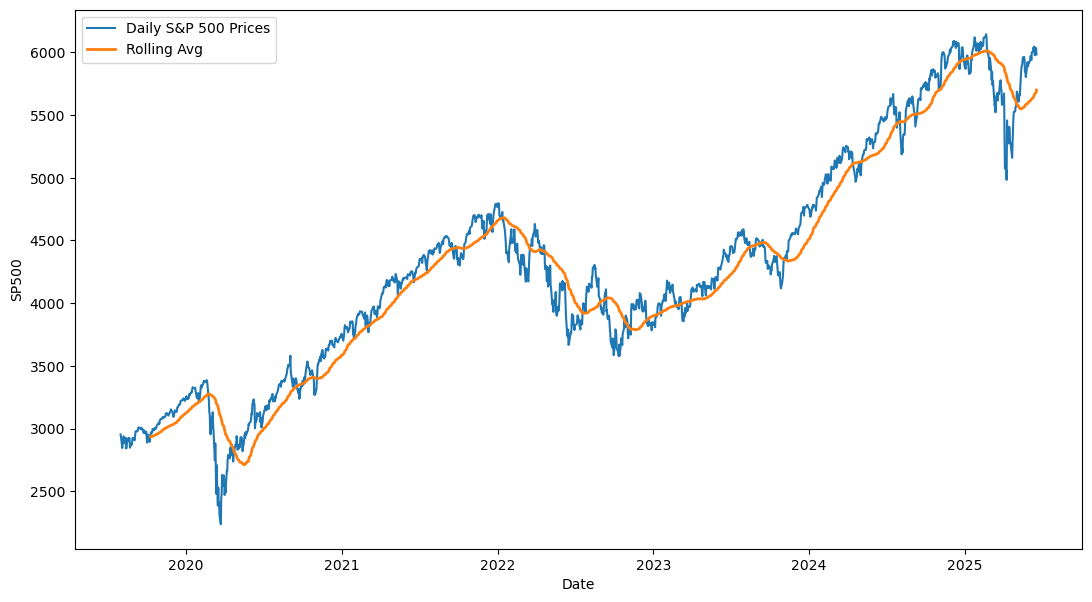

In [70]:
# Calculate 50-day rolling average of the "SP500" column
prices["SP500 50 day_rolling_avg"] = prices.SP500.rolling(50).mean()

# set figure size and plot a simple time series plot using seaborn.lineplot()
plt.figure(figsize = (13, 7))
sns.lineplot(x = "Date", y = "SP500", data = prices, label = "Daily S&P 500 Prices")

# plot rolling average
sns.lineplot(x = "Date", y = "SP500 50 day_rolling_avg", data = prices, label = "Rolling Avg", linewidth =2 )
plt.show()

##### 3) Rolling Distances

The distance between the moving average line and each data point from the S&P 500 chart

In [71]:
((abs(prices - prices.rolling(50).mean())) / prices).mean()

Ticker
SP500                      0.036248
Russell2000                0.047559
SP500 50 day_rolling_avg   0.026964
dtype: float64

This calculation provides a measure of how much, on average, the daily prices deviate from their 50-day rolling average, expressed as a percentage. This can be a useful indicator of the volatility or stability of the asset. Higher values suggest greater fluctuations around the rolling average, while lower values indicate more stable prices.

The values can be useful for understanding the relative volatility of different assets and how much daily prices tend to deviate from their longer-term trends.

##### 4) Standard Deviations

Standard deviation on prices is not as intuitive as calling this on returns since prices start at different points.

In [73]:
df.std()

Ticker
SP500         0.013380
Russell2000   0.017257
dtype: float64

##### 


In [74]:
#Volatility Comparison Function
def investCompare(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    startTime = pd.Timestamp(startTime).tz_localize('UTC')
    endTime   = pd.Timestamp(endTime).tz_localize('UTC')
    prices    = yfin.download(list(tickers.keys()), startTime, endTime, auto_adjust = False)["Adj Close"]
    prices    = prices.rename(columns = tickers)
    returns   = np.log(prices) - np.log(prices.shift(1))
    returns   = returns.iloc[1:, 0:]

    # pull data into separate DataFrame to look at the last 365 days for calculating the high/low metric
    currYear = prices.loc[(endTime - datetime.timedelta(365)).tz_convert(prices.index.tz) : endTime.tz_convert(prices.index.tz)]

    # 1. High-Low
    highLow = (currYear.max() - currYear.min()) / prices.iloc[-1] #Standardized
    highLow = pd.DataFrame(highLow, columns = ["HighMinusLow"])

    # 2. Moving average volatility
    MA = pd.DataFrame(
        ((abs(prices - prices.rolling(50).mean())) / prices).mean(),
        columns = ["MovingAverageVolatility"],
    )
    investments = pd.merge(highLow, MA, left_index = True, right_index = True)

    # 3. Standard deviation
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.std(), columns = ["StandardDeviation"]),
        left_index  = True,
        right_index = True,
    )

    # 4. Daily return
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.mean(), columns = ["Daily Return Percentage"]),
        left_index  = True,
        right_index = True,
    )

    # Format columns:
    # Hogh-Low column rounded to 5 decimal
    investments["HighMinusLow"] = investments["HighMinusLow"].round(4).astype(str)

    # MA, std and returns columns as percentage
    columns = ["MovingAverageVolatility", "StandardDeviation", "Daily Return Percentage"]
    for col in columns:
      investments[col] = (investments[col] * 100).round(3).astype(str) + '%'

    return investments

In [76]:
#Application of function
# Comparing Indices, Stocks in different sectors, Growth vs Value stocks, Domestic vs Foreign stocks
start = datetime.date(2022, 8, 1)
end = datetime.date(2025, 6, 18)
investCompare(start, end,{"^GSPC": "SP500", "^RUT": "Russell2000", "BAW.JO": "Barloworld", "NPN.JO": "Naspers", "VUG": "Growth", "VTV": "Value", "SPEU": "Europe ETF", "GXC": "China ETF"})

[*********************100%***********************]  8 of 8 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Barloworld,0.2726,7.59%,1.884%,0.041%
China ETF,0.3629,3.955%,1.848%,0.052%
Naspers,0.3839,9.736%,2.464%,0.087%
Europe ETF,0.2035,4.369%,1.068%,0.06%
Value,0.1511,1.916%,0.897%,0.048%
Growth,0.2321,4.057%,1.4%,0.081%
SP500,0.1941,2.81%,1.089%,0.059%
Russell2000,0.3241,2.865%,1.423%,0.033%


Considering longer timeframes is generally recommended for investment evaluation but it's not a universal rule:
- Changing Market Dynamics: Long-term historical data might not accurately reflect current or future market conditions. Economic shifts, technological disruptions, heightened regulation, and geopolitical events can significantly impact investment performance, making past trends less relevant.
- Investment Goals and Time Horizon: An investor with a shorter time horizon (e.g., saving for a down payment) might prioritize short-term performance over long-term trends. Their investment strategy and risk tolerance would differ from someone with a longer-term goal (e.g., retirement).
- Missed Opportunities: Focusing solely on long-term trends might lead to missed opportunities in the short term. Active investors or traders might capitalize on short-term market fluctuations to generate returns, even if the long-term outlook is uncertain.
- Survivorship Bias: Long-term data often suffers from survivorship bias, meaning it only includes companies or investments that have survived over time. This can create a distorted view of historical performance, as failed investments are not included in the analysis.